In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import time
import math
import random
import warnings
warnings.filterwarnings('ignore')

import keras
from tensorflow import keras
from keras.layers import Dense, Dropout, Flatten, Activation, LSTM
from keras.engine import input_layer
from keras.models import Sequential
from tensorflow.keras import layers


from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [2]:
#발전기명, 년월일, 설비용량(MW)	01시	02시	03시	04시	05시	06시	07시	08시	09시	10시	11시	12시	13시	14시	15시	16시	17시	18시	19시	20시	21시	22시	23시	24시

dataset1 = pd.read_csv('C:/Users/user/Desktop/Jupyter/Data/태양광_세종.csv', encoding='cp949')
dataset2 = pd.read_csv('C:/Users/user/Desktop/Jupyter/Data/태양광_안산.csv', encoding='cp949')
dataset3 = pd.read_csv('C:/Users/user/Desktop/Jupyter/Data/태양광_영암.csv', encoding='cp949')

dataset1.head()

,발전기명,년월일,설비용량(MW),1,2,3,4,5,6,7,...,15,16,17,18,19,20,21,22,23,24
0,세종시폐기물매립장태양광,2017-01-01,1.628,0,0,0,0,0,0,0,...,742080,334440,87240,2880,4320,0,0,0,0,0
1,세종시폐기물매립장태양광,2017-01-02,1.628,0,0,0,0,0,0,0,...,606360,501120,158280,2760,3360,0,0,0,0,0
2,세종시폐기물매립장태양광,2017-01-03,1.628,0,0,0,0,0,0,0,...,881040,557040,128640,2280,3000,0,0,0,0,0
3,세종시폐기물매립장태양광,2017-01-04,1.628,0,0,0,0,0,0,0,...,677280,502320,112080,1800,2760,0,0,0,0,0
4,세종시폐기물매립장태양광,2017-01-05,1.628,0,0,0,0,0,0,0,...,259560,138840,45000,2520,2880,0,0,0,0,0


### * nan 값 0으로 대체

In [3]:
total_nan_dataset1, total_nan_dataset2, total_nan_dataset3 = dataset1.isnull().sum().sum(), dataset2.isnull().sum().sum(), dataset3.isnull().sum().sum()

print("Before : ", total_nan_dataset1, total_nan_dataset2, total_nan_dataset3)

dataset1, dataset2, dataset3 = dataset1.fillna(0), dataset2.fillna(0), dataset3.fillna(0)
total_nan_dataset1, total_nan_dataset2, total_nan_dataset3 = dataset1.isnull().sum().sum(), dataset2.isnull().sum().sum(), dataset3.isnull().sum().sum()

print("After : ", total_nan_dataset1, total_nan_dataset2, total_nan_dataset3)


Before :  6 5 1
After :  0 0 0


In [4]:
new_dataset1, new_dataset2, new_dataset3 = [], [], []

for i in range(len(dataset1)):
    new_dataset1.extend(dataset1.iloc[i,3:])

for i in range(len(dataset2)):
    new_dataset2.extend(dataset2.iloc[i,3:])

for i in range(len(dataset3)):
    new_dataset3.extend(dataset3.iloc[i,3:])
    
len(new_dataset1), len(new_dataset2), len(new_dataset3)

(40728, 40728, 40728)

In [5]:
df = pd.DataFrame({'local1':new_dataset1,
                   'local2':new_dataset2,
                   'local3':new_dataset3})


train_dataset = df.sample(frac=0.8,random_state=0)
test_dataset = df.drop(train_dataset.index)

train_stats = train_dataset.describe()
train_stats.pop("local2")
train_stats = train_stats.transpose()
train_stats

#레이블
train_labels = train_dataset.pop('local2')
test_labels = test_dataset.pop('local2')

def norm(x):
    return (x - train_stats['mean']) / train_stats['std']

normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

normed_train_data = np.array(normed_train_data)
normed_test_data = np.array(normed_test_data)

normed_train_data = np.reshape(normed_train_data, (normed_train_data.shape[0], 1, normed_train_data.shape[1]))
normed_test_data = np.reshape(normed_test_data, (normed_test_data.shape[0], 1, normed_test_data.shape[1]))

In [6]:
def build_model():
    model = keras.Sequential([
    layers.LSTM(64, activation='relu', input_shape=(1,len(train_dataset.keys()))),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
      ])

    optimizer = tf.keras.optimizers.RMSprop(0.001)

    model.compile(loss='mse',  optimizer='adam', metrics=['mae', 'mse'])
    return model

In [7]:
model = build_model()

In [8]:
EPOCHS = 500

history = model.fit(normed_train_data, train_labels,
  epochs=EPOCHS, validation_split = 0.2, verbose=1) #bactch_size

Epoch 1/500
815/815 [==============================] - 3s 2ms/step - loss: 161133772800.0000 - mae: 215504.8594 - mse: 161133772800.0000 - val_loss: 153504677888.0000 - val_mae: 208966.0000 - val_mse: 153504677888.0000
Epoch 2/500
815/815 [==============================] - 1s 1ms/step - loss: 132278697984.0000 - mae: 193808.7656 - mse: 132278697984.0000 - val_loss: 104831270912.0000 - val_mae: 170038.3281 - val_mse: 104831270912.0000
Epoch 3/500
815/815 [==============================] - 1s 1ms/step - loss: 74340368384.0000 - mae: 141140.0156 - mse: 74340368384.0000 - val_loss: 46167134208.0000 - val_mae: 109220.3984 - val_mse: 46167134208.0000
Epoch 4/500
815/815 [==============================] - 1s 1ms/step - loss: 31052744704.0000 - mae: 87868.5312 - mse: 31052744704.0000 - val_loss: 22210242560.0000 - val_mae: 74587.7031 - val_mse: 22210242560.0000
Epoch 5/500
815/815 [==============================] - 1s 1ms/step - loss: 20236654592.0000 - mae: 69813.6719 - mse: 20236654592.0000 

815/815 [==============================] - 1s 1ms/step - loss: 17364883456.0000 - mae: 67357.3516 - mse: 17364883456.0000 - val_loss: 17682106368.0000 - val_mae: 68736.5469 - val_mse: 17682106368.0000
Epoch 40/500
815/815 [==============================] - 1s 1ms/step - loss: 17364783104.0000 - mae: 67252.5703 - mse: 17364783104.0000 - val_loss: 17680218112.0000 - val_mae: 68718.4297 - val_mse: 17680218112.0000
Epoch 41/500
815/815 [==============================] - 1s 1ms/step - loss: 17360773120.0000 - mae: 67158.9375 - mse: 17360773120.0000 - val_loss: 17704941568.0000 - val_mae: 68831.5547 - val_mse: 17704941568.0000
Epoch 42/500
815/815 [==============================] - 1s 1ms/step - loss: 17354442752.0000 - mae: 67201.1953 - mse: 17354442752.0000 - val_loss: 17675190272.0000 - val_mae: 68646.4531 - val_mse: 17675190272.0000
Epoch 43/500
815/815 [==============================] - 1s 1ms/step - loss: 17354717184.0000 - mae: 67147.3594 - mse: 17354717184.0000 - val_loss: 1766691635

815/815 [==============================] - 1s 1ms/step - loss: 17307224064.0000 - mae: 65801.3438 - mse: 17307224064.0000 - val_loss: 17635870720.0000 - val_mae: 67515.8672 - val_mse: 17635870720.0000
Epoch 78/500
815/815 [==============================] - 1s 1ms/step - loss: 17304897536.0000 - mae: 65813.5625 - mse: 17304897536.0000 - val_loss: 17633118208.0000 - val_mae: 67278.4688 - val_mse: 17633118208.0000
Epoch 79/500
815/815 [==============================] - 1s 1ms/step - loss: 17304168448.0000 - mae: 65720.0312 - mse: 17304168448.0000 - val_loss: 17634115584.0000 - val_mae: 67361.6562 - val_mse: 17634115584.0000
Epoch 80/500
815/815 [==============================] - 1s 1ms/step - loss: 17302241280.0000 - mae: 65676.7422 - mse: 17302241280.0000 - val_loss: 17619564544.0000 - val_mae: 67537.2734 - val_mse: 17619564544.0000
Epoch 81/500
815/815 [==============================] - 1s 1ms/step - loss: 17302652928.0000 - mae: 65726.3906 - mse: 17302652928.0000 - val_loss: 1763388825

815/815 [==============================] - 1s 1ms/step - loss: 17302405120.0000 - mae: 65753.1016 - mse: 17302405120.0000 - val_loss: 17631358976.0000 - val_mae: 66874.5547 - val_mse: 17631358976.0000
Epoch 116/500
815/815 [==============================] - 1s 1ms/step - loss: 17299894272.0000 - mae: 65520.2070 - mse: 17299894272.0000 - val_loss: 17611642880.0000 - val_mae: 67425.7422 - val_mse: 17611642880.0000
Epoch 117/500
815/815 [==============================] - 1s 1ms/step - loss: 17302206464.0000 - mae: 65572.7188 - mse: 17302206464.0000 - val_loss: 17624887296.0000 - val_mae: 67669.9453 - val_mse: 17624887296.0000
Epoch 118/500
815/815 [==============================] - 1s 1ms/step - loss: 17300680704.0000 - mae: 65690.5781 - mse: 17300680704.0000 - val_loss: 17624760320.0000 - val_mae: 67090.6406 - val_mse: 17624760320.0000
Epoch 119/500
815/815 [==============================] - 1s 1ms/step - loss: 17296771072.0000 - mae: 65554.0625 - mse: 17296771072.0000 - val_loss: 176525

815/815 [==============================] - 1s 1ms/step - loss: 17298493440.0000 - mae: 65629.4297 - mse: 17298493440.0000 - val_loss: 17655222272.0000 - val_mae: 67204.8828 - val_mse: 17655222272.0000
Epoch 154/500
815/815 [==============================] - 1s 2ms/step - loss: 17301360640.0000 - mae: 65606.7031 - mse: 17301360640.0000 - val_loss: 17634185216.0000 - val_mae: 66911.9688 - val_mse: 17634185216.0000
Epoch 155/500
815/815 [==============================] - 1s 1ms/step - loss: 17295593472.0000 - mae: 65550.2109 - mse: 17295593472.0000 - val_loss: 17640558592.0000 - val_mae: 66802.4219 - val_mse: 17640558592.0000
Epoch 156/500
815/815 [==============================] - 1s 1ms/step - loss: 17299288064.0000 - mae: 65531.5078 - mse: 17299288064.0000 - val_loss: 17641988096.0000 - val_mae: 66973.9922 - val_mse: 17641988096.0000
Epoch 157/500
815/815 [==============================] - 1s 1ms/step - loss: 17301940224.0000 - mae: 65502.6367 - mse: 17301940224.0000 - val_loss: 176177

815/815 [==============================] - 1s 1ms/step - loss: 17295491072.0000 - mae: 65510.5117 - mse: 17295491072.0000 - val_loss: 17629696000.0000 - val_mae: 66932.4453 - val_mse: 17629696000.0000
Epoch 192/500
815/815 [==============================] - 1s 1ms/step - loss: 17297889280.0000 - mae: 65458.4258 - mse: 17297889280.0000 - val_loss: 17621391360.0000 - val_mae: 67460.6719 - val_mse: 17621391360.0000
Epoch 193/500
815/815 [==============================] - 1s 1ms/step - loss: 17294702592.0000 - mae: 65635.3984 - mse: 17294702592.0000 - val_loss: 17609502720.0000 - val_mae: 66767.9297 - val_mse: 17609502720.0000
Epoch 194/500
815/815 [==============================] - 1s 1ms/step - loss: 17297299456.0000 - mae: 65483.4609 - mse: 17297299456.0000 - val_loss: 17617876992.0000 - val_mae: 67385.2422 - val_mse: 17617876992.0000
Epoch 195/500
815/815 [==============================] - 1s 1ms/step - loss: 17296173056.0000 - mae: 65533.7617 - mse: 17296173056.0000 - val_loss: 176138

815/815 [==============================] - 1s 2ms/step - loss: 17292072960.0000 - mae: 65489.7070 - mse: 17292072960.0000 - val_loss: 17608437760.0000 - val_mae: 67504.2578 - val_mse: 17608437760.0000
Epoch 230/500
815/815 [==============================] - 1s 2ms/step - loss: 17294340096.0000 - mae: 65520.1836 - mse: 17294340096.0000 - val_loss: 17624018944.0000 - val_mae: 67257.8047 - val_mse: 17624018944.0000
Epoch 231/500
815/815 [==============================] - 1s 2ms/step - loss: 17289234432.0000 - mae: 65513.5586 - mse: 17289234432.0000 - val_loss: 17610326016.0000 - val_mae: 67122.6797 - val_mse: 17610326016.0000
Epoch 232/500
815/815 [==============================] - 1s 2ms/step - loss: 17291835392.0000 - mae: 65506.1172 - mse: 17291835392.0000 - val_loss: 17633603584.0000 - val_mae: 66900.9141 - val_mse: 17633603584.0000
Epoch 233/500
815/815 [==============================] - 1s 1ms/step - loss: 17291945984.0000 - mae: 65491.2930 - mse: 17291945984.0000 - val_loss: 176216

815/815 [==============================] - 1s 1ms/step - loss: 17289641984.0000 - mae: 65479.3242 - mse: 17289641984.0000 - val_loss: 17609965568.0000 - val_mae: 67245.5859 - val_mse: 17609965568.0000
Epoch 268/500
815/815 [==============================] - 1s 2ms/step - loss: 17287249920.0000 - mae: 65470.8828 - mse: 17287249920.0000 - val_loss: 17609672704.0000 - val_mae: 67315.4609 - val_mse: 17609672704.0000
Epoch 269/500
815/815 [==============================] - 1s 1ms/step - loss: 17290297344.0000 - mae: 65495.0781 - mse: 17290297344.0000 - val_loss: 17605046272.0000 - val_mae: 67233.1016 - val_mse: 17605046272.0000
Epoch 270/500
815/815 [==============================] - 1s 1ms/step - loss: 17283188736.0000 - mae: 65509.9219 - mse: 17283188736.0000 - val_loss: 17634154496.0000 - val_mae: 67007.0000 - val_mse: 17634154496.0000
Epoch 271/500
815/815 [==============================] - 1s 2ms/step - loss: 17290563584.0000 - mae: 65478.7891 - mse: 17290563584.0000 - val_loss: 176247

815/815 [==============================] - 1s 1ms/step - loss: 17277861888.0000 - mae: 65411.4023 - mse: 17277861888.0000 - val_loss: 17643419648.0000 - val_mae: 67397.6094 - val_mse: 17643419648.0000
Epoch 306/500
815/815 [==============================] - 1s 1ms/step - loss: 17286508544.0000 - mae: 65510.3281 - mse: 17286508544.0000 - val_loss: 17615316992.0000 - val_mae: 67083.9922 - val_mse: 17615316992.0000
Epoch 307/500
815/815 [==============================] - 1s 1ms/step - loss: 17281800192.0000 - mae: 65423.9336 - mse: 17281800192.0000 - val_loss: 17595109376.0000 - val_mae: 67387.3906 - val_mse: 17595109376.0000
Epoch 308/500
815/815 [==============================] - 1s 1ms/step - loss: 17283158016.0000 - mae: 65519.5547 - mse: 17283158016.0000 - val_loss: 17604040704.0000 - val_mae: 66898.0000 - val_mse: 17604040704.0000
Epoch 309/500
815/815 [==============================] - 1s 1ms/step - loss: 17276946432.0000 - mae: 65487.4844 - mse: 17276946432.0000 - val_loss: 175875

815/815 [==============================] - 1s 1ms/step - loss: 17274437632.0000 - mae: 65428.3945 - mse: 17274437632.0000 - val_loss: 17583269888.0000 - val_mae: 67299.9688 - val_mse: 17583269888.0000
Epoch 344/500
815/815 [==============================] - 1s 2ms/step - loss: 17272125440.0000 - mae: 65473.5586 - mse: 17272125440.0000 - val_loss: 17587191808.0000 - val_mae: 66859.2188 - val_mse: 17587191808.0000
Epoch 345/500
815/815 [==============================] - 1s 2ms/step - loss: 17274040320.0000 - mae: 65436.4766 - mse: 17274040320.0000 - val_loss: 17583857664.0000 - val_mae: 67183.4219 - val_mse: 17583857664.0000
Epoch 346/500
815/815 [==============================] - 1s 1ms/step - loss: 17271545856.0000 - mae: 65440.2539 - mse: 17271545856.0000 - val_loss: 17580695552.0000 - val_mae: 67002.1484 - val_mse: 17580695552.0000
Epoch 347/500
815/815 [==============================] - 1s 2ms/step - loss: 17270728704.0000 - mae: 65375.7695 - mse: 17270728704.0000 - val_loss: 175864

815/815 [==============================] - 1s 1ms/step - loss: 17253468160.0000 - mae: 65354.7148 - mse: 17253468160.0000 - val_loss: 17561475072.0000 - val_mae: 66966.6172 - val_mse: 17561475072.0000
Epoch 382/500
815/815 [==============================] - 1s 1ms/step - loss: 17259321344.0000 - mae: 65337.6484 - mse: 17259321344.0000 - val_loss: 17584570368.0000 - val_mae: 67479.9766 - val_mse: 17584570368.0000
Epoch 383/500
815/815 [==============================] - 1s 1ms/step - loss: 17254461440.0000 - mae: 65456.1914 - mse: 17254461440.0000 - val_loss: 17563353088.0000 - val_mae: 66942.1719 - val_mse: 17563353088.0000
Epoch 384/500
815/815 [==============================] - 1s 1ms/step - loss: 17253795840.0000 - mae: 65418.5742 - mse: 17253795840.0000 - val_loss: 17598029824.0000 - val_mae: 66530.6250 - val_mse: 17598029824.0000
Epoch 385/500
815/815 [==============================] - 1s 1ms/step - loss: 17251944448.0000 - mae: 65328.7070 - mse: 17251944448.0000 - val_loss: 175877

815/815 [==============================] - 1s 2ms/step - loss: 17205641216.0000 - mae: 65236.3672 - mse: 17205641216.0000 - val_loss: 17514840064.0000 - val_mae: 67266.0547 - val_mse: 17514840064.0000
Epoch 420/500
815/815 [==============================] - 1s 1ms/step - loss: 17205571584.0000 - mae: 65335.8125 - mse: 17205571584.0000 - val_loss: 17529274368.0000 - val_mae: 66499.8984 - val_mse: 17529274368.0000
Epoch 421/500
815/815 [==============================] - 1s 1ms/step - loss: 17201508352.0000 - mae: 65250.4531 - mse: 17201508352.0000 - val_loss: 17525669888.0000 - val_mae: 66925.8828 - val_mse: 17525669888.0000
Epoch 422/500
815/815 [==============================] - 1s 1ms/step - loss: 17198581760.0000 - mae: 65258.6758 - mse: 17198581760.0000 - val_loss: 17536581632.0000 - val_mae: 66997.4922 - val_mse: 17536581632.0000
Epoch 423/500
815/815 [==============================] - 1s 1ms/step - loss: 17193631744.0000 - mae: 65262.1992 - mse: 17193631744.0000 - val_loss: 175336

815/815 [==============================] - 1s 1ms/step - loss: 17043926016.0000 - mae: 64996.1328 - mse: 17043926016.0000 - val_loss: 17389983744.0000 - val_mae: 66501.4531 - val_mse: 17389983744.0000
Epoch 458/500
815/815 [==============================] - 1s 2ms/step - loss: 17055011840.0000 - mae: 64928.3984 - mse: 17055011840.0000 - val_loss: 17401563136.0000 - val_mae: 66723.0312 - val_mse: 17401563136.0000
Epoch 459/500
815/815 [==============================] - 1s 2ms/step - loss: 17051262976.0000 - mae: 64971.3789 - mse: 17051262976.0000 - val_loss: 17388181504.0000 - val_mae: 66727.2266 - val_mse: 17388181504.0000
Epoch 460/500
815/815 [==============================] - 1s 1ms/step - loss: 17045659648.0000 - mae: 64954.9336 - mse: 17045659648.0000 - val_loss: 17366347776.0000 - val_mae: 66619.2500 - val_mse: 17366347776.0000
Epoch 461/500
815/815 [==============================] - 1s 1ms/step - loss: 17041582080.0000 - mae: 64933.6523 - mse: 17041582080.0000 - val_loss: 173873

815/815 [==============================] - 1s 1ms/step - loss: 16942340096.0000 - mae: 64743.1797 - mse: 16942340096.0000 - val_loss: 17276018688.0000 - val_mae: 66401.3047 - val_mse: 17276018688.0000
Epoch 496/500
815/815 [==============================] - 1s 1ms/step - loss: 16931445760.0000 - mae: 64756.5117 - mse: 16931445760.0000 - val_loss: 17309911040.0000 - val_mae: 66171.5156 - val_mse: 17309911040.0000
Epoch 497/500
815/815 [==============================] - 1s 1ms/step - loss: 16941002752.0000 - mae: 64786.4297 - mse: 16941002752.0000 - val_loss: 17274935296.0000 - val_mae: 65855.5312 - val_mse: 17274935296.0000
Epoch 498/500
815/815 [==============================] - 1s 1ms/step - loss: 16933866496.0000 - mae: 64643.0781 - mse: 16933866496.0000 - val_loss: 17251164160.0000 - val_mae: 66827.4531 - val_mse: 17251164160.0000
Epoch 499/500
815/815 [==============================] - 1s 1ms/step - loss: 16935972864.0000 - mae: 64737.3750 - mse: 16935972864.0000 - val_loss: 172416

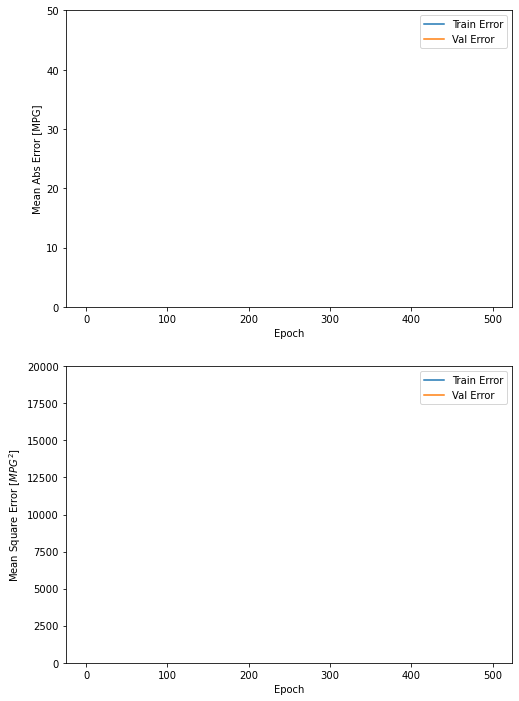

In [9]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

import matplotlib.pyplot as plt

def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure(figsize=(8,12))

    plt.subplot(2,1,1)
    plt.xlabel('Epoch')
    plt.ylabel('Mean Abs Error [MPG]')
    plt.plot(hist['epoch'], hist['mae'], label='Train Error')
    plt.plot(hist['epoch'], hist['val_mae'], label = 'Val Error')
    plt.ylim([0,50])
    plt.legend()

    plt.subplot(2,1,2)
    plt.xlabel('Epoch')
    plt.ylabel('Mean Square Error [$MPG^2$]')
    plt.plot(hist['epoch'], hist['mse'], label='Train Error')
    plt.plot(hist['epoch'], hist['val_mse'], label = 'Val Error')
    plt.ylim([0,20000])
    plt.legend()
    plt.show()

plot_history(history)

In [10]:
loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=2)

print("테스트 세트의 평균 절대 오차: {:5.2f} local1".format(mae))

255/255 - 0s - loss: 16689992704.0000 - mae: 62672.3867 - mse: 16689992704.0000 - 227ms/epoch - 892us/step
테스트 세트의 평균 절대 오차: 62672.39 local1


In [11]:
255/255 - 0s - loss: 0.9366 - mae: 0.3786 - mse: 0.9366 - 142ms/epoch - 556us/step
테스트 세트의 평균 절대 오차:  0.38 local1

SyntaxError: invalid syntax (4146037379.py, line 1)